#Load Libraries

In [0]:
import numpy as np
import pandas as pd
from pandas import read_csv
#Load sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns

#Loading the dataset

In [12]:
url = "https://drive.google.com/uc?export=download&id=1_ed0Q_3FVFKvdbcxDFDDluknl_aClmU_"
df = pd.read_excel(url)
print('Columns:', list(df))
dataset = df.values

Columns: ['STATEFP', 'COUNTYFP', 'GEOID', 'COUNTYNS', 'AFFGEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'DW1', 'DW2', 'DW3', 'DW4', 'DW5', 'DW6', 'DW7', 'DW8', 'DW9', 'DW10', 'DW11', 'DW12', 'DW13', 'DW14', 'DW15', 'DW16', 'DW17', 'DW18', 'DW19', 'DW20', 'DW21', 'DW22', 'DW23', 'DW24', 'DW25', 'DW26', 'DW27', 'DW28', 'DW29', 'DW30', 'DW31', 'DW32', 'DW33', 'DW34', 'DW35', 'DW36', 'DW37', 'DW38', 'DW39', 'DW40', 'DW41', 'DW42', 'DW43', 'DW44', 'DW45', 'DW46', 'DW47', 'DW48', 'DW49', 'DW50', 'DW51', 'DW52', 'DW53', 'DW54', 'DW55', 'DW56', 'DW57', 'DW58', 'DW59', 'DW60', 'DW61', 'DW62', 'DW63', 'DW64', 'DW65', 'DW66', 'DW67', 'DW68', 'DW69', 'DW70', 'DW71', 'DW72', 'DW73', 'DW74', 'DW75', 'DW76', 'DW77', 'DW78', 'DW79', 'DW80', 'DW81', 'DW82', 'DW83', 'DW84', 'DW85', 'DW86', 'DW87', 'DW88', 'DW89', 'DW90', 'DW91', 'DW92', 'DW93', 'DW94', 'DW95', 'DW96', 'DW97', 'DW98', 'DW99', 'DW100', 'DW101', 'DW102', 'DW103', 'DW104', 'DW105', 'DW106', 'DW107', 'DW108', 'DW109', 'DW110', 'DW111', 'DW112',

In [0]:
#setting random seed
np.random.seed(123)
#Subsetting dataset to select only required columns
dataset = df.iloc[:,7:477]

In [0]:
dataset.columns

Index(['ALAND', 'AWATER', 'DW1', 'DW2', 'DW3', 'DW4', 'DW5', 'DW6', 'DW7',
       'DW8',
       ...
       'DW459', 'DW460', 'DW461', 'DW462', 'DW463', 'DW464', 'DW465', 'DW466',
       'DW467', 'DW468'],
      dtype='object', length=470)

#Missing data analysis

In [14]:
#checking for null values in the dataset
dataset.isnull().sum()
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 1 to 3142
Columns: 470 entries, ALAND to DW468
dtypes: float64(468), int64(2)
memory usage: 11.3 MB
None


#EDA

#Highly populated counties

In [0]:
dataset_largest_population = df.nlargest(10,'medianPopulation') 

city_data = {'State' : dataset_largest_population.STNAME , 'City' : dataset_largest_population.CTYNAME , 'Population' :  dataset_largest_population.medianPopulation }
top_populated_cities = pd.DataFrame(data = city_data)

top_populated_cities

,City,Population,State
3036,Los Angeles,10123248,California
411,Cook,5245831,Illinois
2375,Harris,4551362,Texas
1915,Maricopa,4154076,Arizona
3056,San Diego,3290044,California
3048,Orange,3160576,California
130,Miami-Dade,2705982,Florida
1641,Kings,2643546,New York
2327,Dallas,2554233,Texas
3051,Riverside,2352080,California


#Sparsely populated cities

In [0]:
dataset_smallest_population = df.nsmallest(10,'medianPopulation') 

city_data = {'State' : dataset_smallest_population.STNAME , 'City' : dataset_smallest_population.CTYNAME , 'Population' :  dataset_smallest_population.medianPopulation }
least_populated_cities = pd.DataFrame(data = city_data)

least_populated_cities 

,City,Population,State
300,Kalawao,88,Hawaii
2431,Loving,115,Texas
2412,King,284,Texas
2408,Kenedy,431,Texas
1500,Arthur,454,Nebraska
1522,Blaine,477,Nebraska
1417,Petroleum,498,Montana
1445,McPherson,505,Nebraska
1444,Loup,606,Nebraska
662,Yakutat City and Borough,635,Alaska


#Counties with the largest water area

In [0]:
dataset_largest_water_area = df.nlargest(10,'AWATER') 

city_data = {'State' : dataset_largest_water_area.STNAME , 'City' : dataset_largest_water_area.CTYNAME , 'Population' :  dataset_largest_water_area.medianPopulation }
largest_water_area_cities = pd.DataFrame(data = city_data)

largest_water_area_cities

,City,Population,State
662,Yakutat City and Borough,635,Alaska
649,Lake and Peninsula Borough,1620,Alaska
648,Aleutians West Census Area,5763,Alaska
643,Kenai Peninsula Borough,58067,Alaska
644,Aleutians East Borough,3325,Alaska
660,Valdez-Cordova Census Area,9340,Alaska
652,North Slope Borough,9776,Alaska
655,Prince of Wales-Hyder Census Area,6462,Alaska
646,Kodiak Island Borough,13753,Alaska
1085,Keweenaw,2139,Michigan


#Removing outliers

In [0]:
#percentiles = df._get_numeric_data()
#converting the values to 0 if percentiles are negative
dataset[dataset< 0] = 0

#Scaling the dataset - Min-Max Scaler

In [16]:
#initializing minmaxscaler instance
scaler = MinMaxScaler()
#fitting and transforming the scaler on the scaled data
scaled_data = scaler.fit_transform(dataset)
#creating a dataframe of scaled data
dataset = pd.DataFrame(scaled_data, index = dataset.index , columns = dataset.columns)
print(dataset.head())

      ALAND    AWATER       DW1       DW2       DW3       DW4       DW5  \
1  0.004070  0.000727  0.006506  0.008340  0.008403  0.008441  0.007885   
2  0.005380  0.001074  0.001859  0.008981  0.009524  0.009930  0.009012   
3  0.003966  0.001439  0.012082  0.014113  0.013445  0.013406  0.011640   
4  0.004930  0.000309  0.000000  0.002566  0.002801  0.003476  0.003379   
5  0.006041  0.000636  0.000000  0.005132  0.005042  0.005462  0.004881   

        DW6       DW7       DW8    ...        DW459     DW460     DW461  \
1  0.006626  0.007230  0.008227    ...     0.016493  0.012085  0.009416   
2  0.007810  0.010060  0.018751    ...     0.016493  0.012403  0.010292   
3  0.009940  0.010531  0.012819    ...     0.021532  0.016220  0.013576   
4  0.002840  0.002672  0.002487    ...     0.013286  0.009541  0.007007   
5  0.004023  0.003615  0.003348    ...     0.014202  0.010495  0.007883   

      DW462     DW463     DW464     DW465     DW466     DW467     DW468  
1  0.008332  0.008234  0

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#Mean Absolute Percentage Error

In [0]:
#computing MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Random Forest - 10 Fold Cross Validation

In [26]:
from sklearn.ensemble import RandomForestRegressor

#specifying folds
k = 10
#identifying the number of records in each fold
num_val_samples = len(dataset) // k

#shuffling the dataset
dataset.sample(frac = 1)

#training set
train_data=dataset.iloc[:,0:470]
#target
train_target=df.medianPopulation

#arrays to store MAPE and MAE
Train_MAPE_RandomForest = []
Train_MAE_RandomForest = []
Validation_MAPE_RandomForest = []
Validation_MAE_RandomForest = []

for i in range(k):
  print('processing fold #', i)  
  
  #generating validation set
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_target[i * num_val_samples: (i + 1) * num_val_samples]

  #generating training set
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_target[:i * num_val_samples],train_target[(i + 1) * num_val_samples:]],axis=0)
  
  #invoking Random Forest model
  model = RandomForestRegressor()
  #fitting the model
  model.fit(partial_train_data, np.ravel(partial_train_targets))
  
  #making predictions on training and validation sets
  train_predictions = model.predict(partial_train_data)
  validation_predictions = model.predict(val_data)
  
  #appending the validation predictions to the dataset
  dataset.loc[np.array(list(val_data.index)), ('RandomForestRegressor_Validation')] = validation_predictions
  
  #appending MAPE and MAE values to the respective arrays
  Train_MAPE_RandomForest.append(mean_absolute_percentage_error(partial_train_targets,train_predictions )) 
  Train_MAE_RandomForest.append(mean_absolute_error(partial_train_targets, train_predictions))
  Validation_MAPE_RandomForest.append(mean_absolute_percentage_error(val_targets, validation_predictions)) 
  Validation_MAE_RandomForest.append(mean_absolute_error(val_targets, validation_predictions))

processing fold # 0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold # 1


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold # 2


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold # 3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold # 4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold # 5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold # 6


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold # 7


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold # 8


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold # 9


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#Dense Neural Network Model


In [0]:
from keras import models
from keras import layers
from keras import regularizers
from keras import metrics

#Neural Network Model
def get_model():
  
  model = models.Sequential()
  model.add(layers.Dense(940, kernel_regularizer = regularizers.l2(0.001), input_shape = (470,), activation='relu'))
  #Adding 50% drop out
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(470, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(235, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(117, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(58, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1, activation='linear'))
  
  #compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
  return model

#Neural Network - 10 Fold Cross Validation

In [0]:
k = 10
num_val_samples = len(df) // k
num_epochs = 200
all_scores = []
batch_size = 100

#shuffling the dataframe
dataset.sample(frac = 1)

#subsetting the training data
train_data = dataset.iloc[:,0:470]
#fetching the target columns
train_targets = df.medianPopulation

#arrays to store the MAPE and MAE values
Train_MAPE_NN = []
Train_MAE_NN = []
Validation_MAPE_NN = []
Validation_MAE_NN = []

#creating a dataframe to store the Training and Validation MSE for all folds
columns = {'Fold' : [],'Train MSE' : [],'Validation MSE' : [] }
all_mse_histories = pd.DataFrame(data = columns)

for i in range(k):
  
  print('processing fold #', i)
  
  #splitting the train_data to generate validation set
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  #generating training set
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
  
  #invoking neural network model
  model = get_model()
  #fitting the model
  train_set_history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=batch_size)
  
  #fetching training MSE
  train_mse_history = train_set_history.history['mean_squared_error']
  #fetching Validation MSE
  validation_mse_history = train_set_history.history['val_mean_squared_error']
  
  #appending values to the dataframe
  values = pd.DataFrame({'Fold' : i,'Train MSE' : train_mse_history,'Validation MSE' : validation_mse_history })
  all_mse_histories = all_mse_histories.append( values,ignore_index = True)
 
  #generating predictions for training and validation set
  train_predictions = model.predict(partial_train_data)
  validation_predictions = model.predict(val_data)
  
  print(validation_predictions.shape)
  validation_predictions = validation_predictions.reshape(num_val_samples,) #reshaping 
  
  #appending the predictions to the dataset
  dataset.loc[np.array(list(val_data.index)), ('NeuralNets_Validation')] = validation_predictions
  
  #Appending the MAPE and MAE values to the respective arrays
  Train_MAPE_NN.append(mean_absolute_percentage_error(partial_train_targets, train_predictions)) 
  Train_MAE_NN.append(mean_absolute_error(partial_train_targets, train_predictions))
  Validation_MAPE_NN.append(mean_absolute_percentage_error(val_targets, validation_predictions)) 
  Validation_MAE_NN.append(mean_absolute_error(val_targets, validation_predictions))

processing fold # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2828 samples, validate on 314 samples
Epoch 1/200
2828/2828 [==============================] - 2s 739us/step - loss: 121534852589.8953 - mean_squared_error: 121534852589.8953 - val_loss: 90691930007.6433 - val_mean_squared_error: 90691930007.6433
Epoch 2/200
2828/2828 [==============================] - 1s 363us/step - loss: 118042635886.8006 - mean_squared_error: 118042635886.8006 - val_loss: 69376772591.6943 - val_mean_squared_error: 69376772591.6943
Epoch 3/200
2828/2828 [==============================] - 1s 390us/step - loss: 93683282807.1287 - mean_squared_error: 93683282807.1287 - val_loss: 47453670791.3376 - val_mean_squared_error: 47453670791.3376
Epoch 4/200
2828/2828 [==============================] - 1s 391us/step - 

In [0]:
display(all_mse_histories.head())

,Fold,Train MSE,Validation MSE
0,0.0,1.765408e+11,6.040218e+10
1,0.0,1.765069e+11,6.028694e+10
2,0.0,1.754412e+11,5.790493e+10
3,0.0,1.651550e+11,4.121469e+10
4,0.0,1.294349e+11,3.464287e+10


#Smooth Curve

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


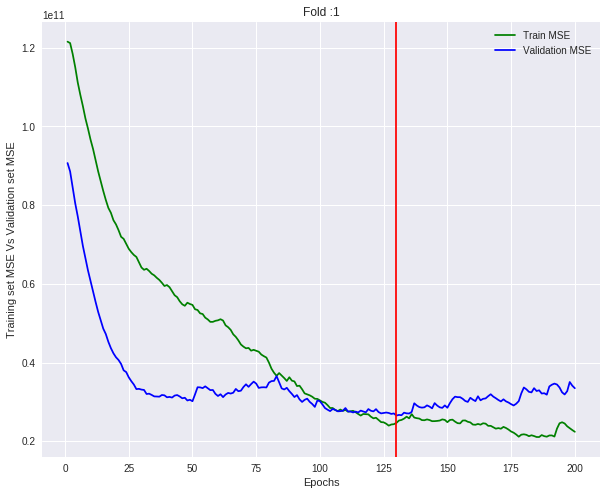

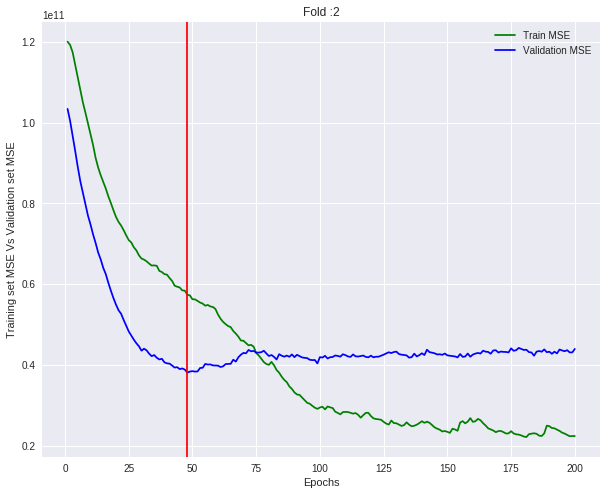

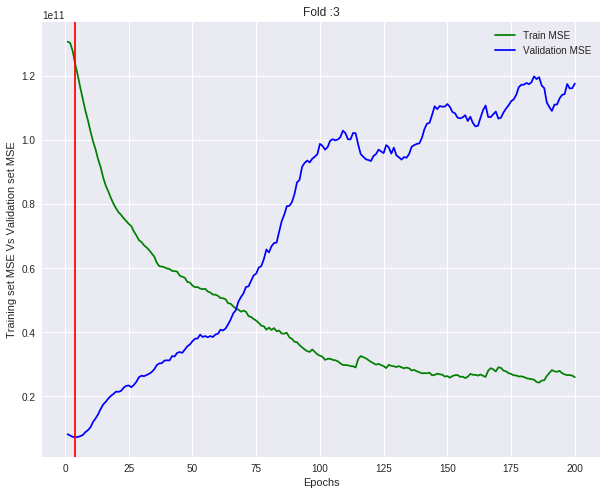

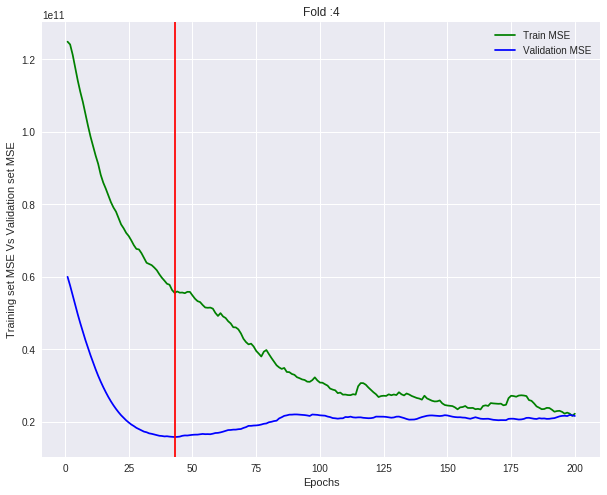

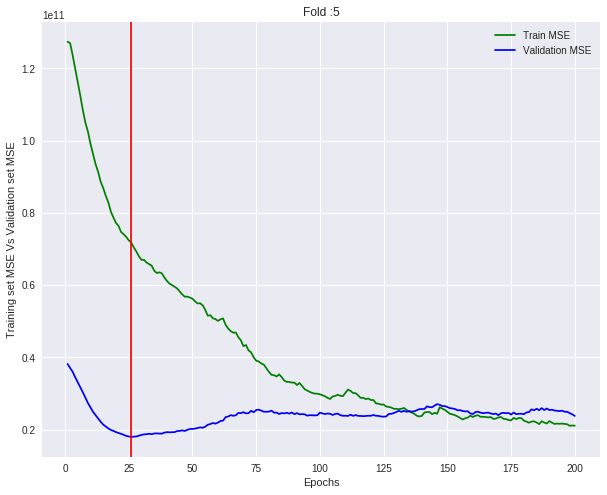

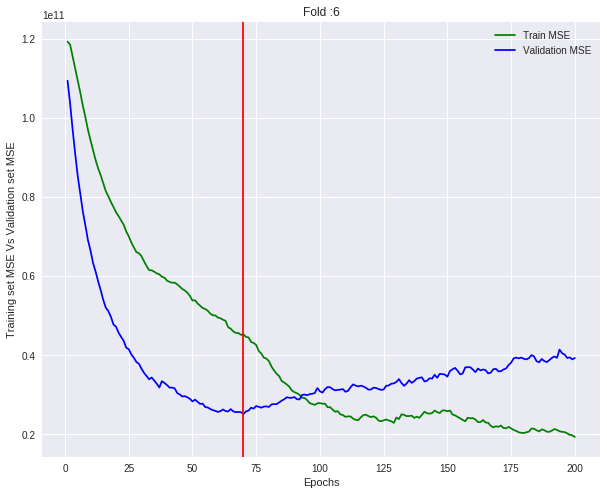

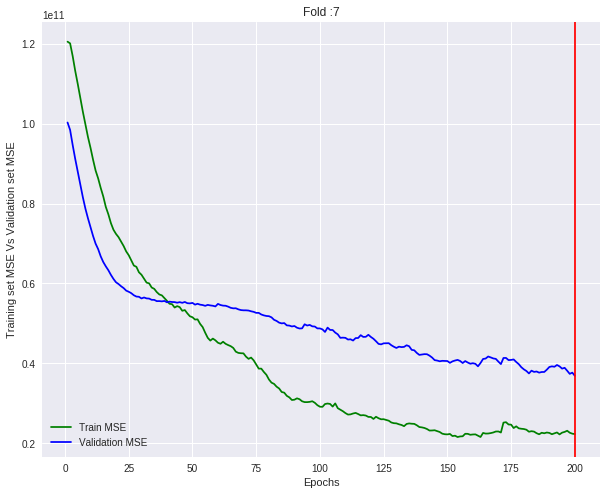

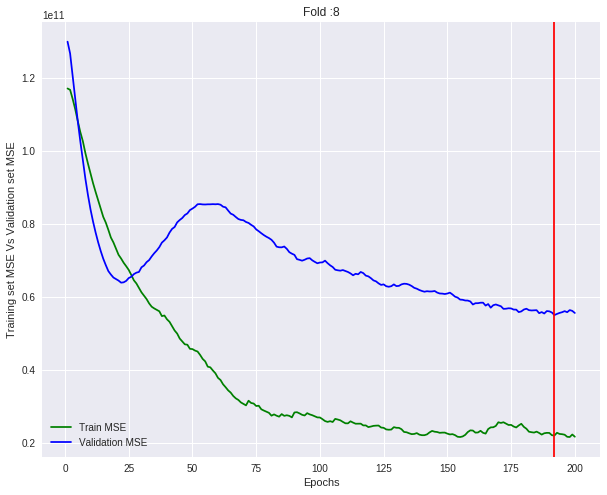

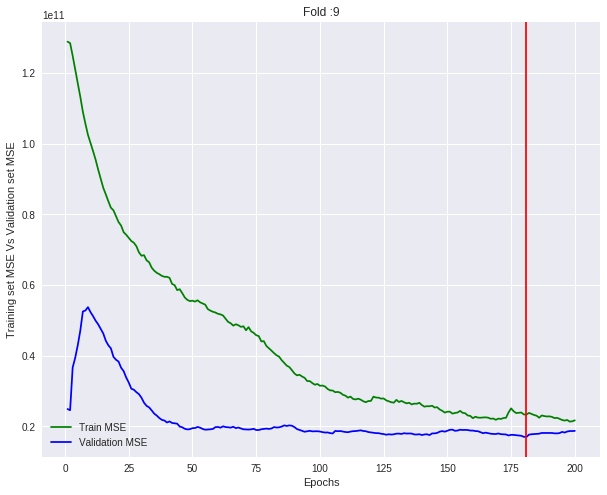

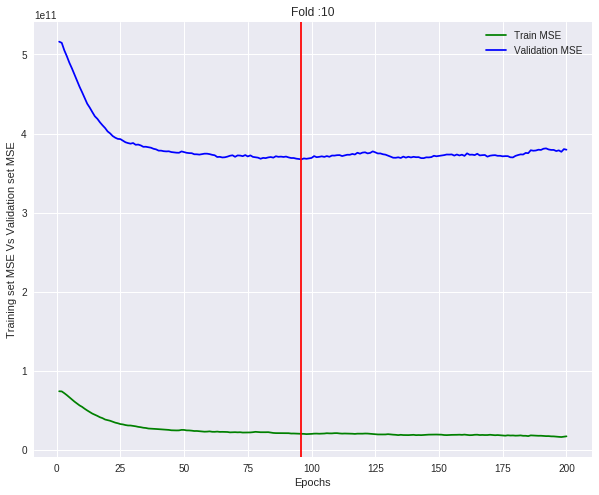

,Fold,MSE Value,Test Epochs
0,1,2.650754e+10,130.0
0,2,3.808956e+10,48.0
0,3,7.323404e+09,4.0
0,4,1.580543e+10,43.0
0,5,1.792597e+10,26.0
0,6,2.511704e+10,70.0
0,7,3.691202e+10,200.0
0,8,5.510052e+10,192.0
0,9,1.699868e+10,181.0
0,10,3.674373e+11,96.0


In [25]:
import matplotlib.pyplot as plt

#defining the table
table=pd.DataFrame(data= {'Fold': [] , 'Test Epochs' : [] , 'MSE Value' : []})
k= 10
for i in range(k):
  plt.figure(figsize=(10,8))
  
  history = all_mse_histories[all_mse_histories.Fold==i]
  history['Epoch']=history.reset_index().index + 1
  
  x=range(1, len(history) + 1)
  
  y=smooth_curve(history['Train MSE'])
  z=smooth_curve(history['Validation MSE'])
  
  #plotting the training and validation curves
  plt.plot(x,y,color='green',label='Train curve')
  plt.plot(x,z,color='blue' , label='Validation curve')
  plt.xlabel('Epochs')
  plt.ylabel('Training set MSE Vs Validation set MSE')
  plt.title('Fold :' + str(i+1))
  plt.legend(['Train MSE','Validation MSE'])
  
  #The epoch where the training error starts to decrease and the validation error starts to increase
  min_epoch=pd.Series(x[np.argmin(z)])
  
  #appending the values to the table
  table_values=pd.DataFrame({'Fold' : str(i+1),'Test Epochs' :min_epoch ,'MSE Value' : z[int(min_epoch)-1] })
  table=table.append(table_values)
  
  #identifying the optimal point where validation error starts increasing and training error continues to decrease
  plt.axvline(x=int(min_epoch), color = 'red')
  plt.show()
  
display(table)

In [27]:
#creating an array to store the errors from Random Forest Regressor and Neural Network
error_arr = []
error_arr.append([np.mean(Train_MAPE_NN), np.std(Train_MAPE_NN), np.mean(Train_MAE_NN), np.std(Train_MAE_NN), np.mean(Validation_MAPE_NN), np.std(Validation_MAPE_NN), np.mean(Validation_MAE_NN), np.std(Validation_MAE_NN)])
error_arr.append([np.mean(Train_MAPE_RandomForest), np.std(Train_MAPE_RandomForest), np.mean(Train_MAE_RandomForest), np.std(Train_MAE_RandomForest), np.mean(Validation_MAPE_RandomForest), np.std(Validation_MAPE_RandomForest), np.mean(Validation_MAE_RandomForest), np.std(Validation_MAE_RandomForest)])

#Creating a dataframe to display the mean and standard deviation of the errors
error_df = pd.DataFrame(error_arr, columns = ['Train MAPE', 'Train MAPE(sd)', 'Validation MAPE', 'Validation (sd)', 'Train MAE', 'Train MAE(sd)', 'Validation MAE', 'Validation MAE(sd)'])
error_df.rename(index={0:'Neural Net', 1:'Random Forest'}, inplace=True)
display(error_df)

,Train MAPE,Train MAPE(sd),Validation MAPE,Validation (sd),Train MAE,Train MAE(sd),Validation MAE,Validation MAE(sd)
Neural Net,875.855325,70.457312,40426.675829,2869.256947,297.691067,371.028835,63453.878559,28032.039435
Random Forest,129.333921,150.690505,18478.372712,2085.580253,203.007925,274.966803,61786.280350,25341.733812


In [0]:
dataset = dataset.join(df.STNAME)
dataset = dataset.join(df.CTYNAME)
dataset = dataset.join(df.medianPopulation)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 1 to 3142
Columns: 475 entries, ALAND to medianPopulation
dtypes: float64(472), int64(1), object(2)
memory usage: 11.5+ MB


In [0]:
def compute_metrics(data_Y_test,predictions):
  ape = (abs(data_Y_test - predictions)/data_Y_test)*100
  return ape

In [0]:
states = ['California', 'Texas', 'Florida']

state_ae_arr = []
state_ape_arr = []
for state in states:
  dataset_state = dataset[dataset['STNAME'] == state]
  actual = dataset_state['medianPopulation'].values
  predicted = dataset_state['NeuralNets_Validation'].values
  
  state_ae_arr.append(np.abs(actual - predicted))
  state_ape_arr.append(compute_metrics(actual, predicted))

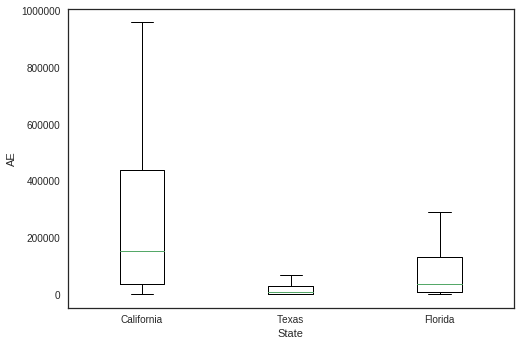

In [0]:
fig, ax = plt.subplots()
ax.boxplot(state_ae_arr, showfliers=False )
ax.set_xlabel('State')
ax.set_ylabel('AE')
ax.set_xticklabels(states)

plt.show()

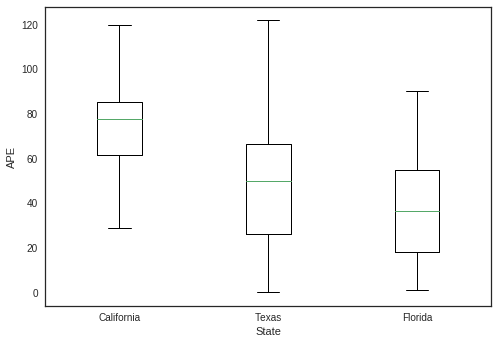

In [0]:
fig, ax = plt.subplots()
ax.boxplot(state_ape_arr, showfliers=False)
ax.set_xlabel('State')
ax.set_ylabel('APE')
ax.set_xticklabels(states)

plt.show()

In [0]:
#finding AE to identify the 50 worst predicted counties

actual = dataset['medianPopulation'].values
predicted = dataset['NeuralNets_Validation'].values

ae = abs(actual - predicted)
worst_predicted_counties = dataset
worst_predicted_counties['AE'] =  ae
#higher value of AE indicates bad predictions
worst_counties = worst_predicted_counties.nlargest(50,'AE') 
worst_counties.CTYNAME 


worst = pd.DataFrame({'County':worst_counties.CTYNAME,'State':worst_counties.STNAME} )
display(worst)

,County,State
3036,Los Angeles,California
663,Yukon-Koyukuk Census Area,Alaska
931,Jefferson Parish,Louisiana
1915,Maricopa,Arizona
411,Cook,Illinois
2375,Harris,Texas
130,Miami-Dade,Florida
3056,San Diego,California
649,Lake and Peninsula Borough,Alaska
3051,Riverside,California
